   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 36.7 MB/s eta 0:00:0000:0100:01m
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11

2025-12-09 12:28:00.960782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765283281.304275      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765283281.435467      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


資料讀取成功！
Drugs: (1410, 9)
Diseases: (1573, 5)
Mapping: (42200, 2)
Converting SMILES → Morgan Fingerprints...
Drug feature dimension = 3042 (FP + Target multi-hot)
Total distinct diseases = 1573
Building positive and negative samples...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Positive samples: (42200, 4619)
Negative samples: (42200, 4619)
Final dataset: (84400, 4619)
ML Feature Matrix: (84400, 4615)
DNN Drug Feature Matrix: (84400, 3042)
DNN Disease Index: (84400,)
Labels: (84400,)
Train size: 67520
Test size : 16880

Training Logistic Regression...
Training Random Forest...
Training XGBoost...

ML models training completed.

Building MM-DNN model...


2025-12-09 12:42:18.839519: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Drug_Input          │ (None, 3042)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    779,008 │ Drug_Input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Disease_Input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 32)     │     50,336 │ Disease_Input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 32)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 160)       │          0 │ dropout_1[0][0],  │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │        161 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 863,937 (3.30 MB)

 Trainable params: 863,169 (3.29 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - AUC: 0.5042 - accuracy: 0.5026 - loss: 1.3251 - val_AUC: 0.5585 - val_accuracy: 0.5438 - val_loss: 1.1215
Epoch 2/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 0.5464 - accuracy: 0.5346 - loss: 1.1348 - val_AUC: 0.7241 - val_accuracy: 0.6639 - val_loss: 1.0243
Epoch 3/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 0.6406 - accuracy: 0.6057 - loss: 1.0271 - val_AUC: 0.8007 - val_accuracy: 0.7369 - val_loss: 0.9342
Epoch 4/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 0.7347 - accuracy: 0.6786 - loss: 0.9290 - val_AUC: 0.8297 - val_accuracy: 0.7643 - val_loss: 0.8532
Epoch 5/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 0.7975 - accuracy: 0.7319 - loss: 0.8428 - val_AUC: 0.8416 - val_accuracy: 0.7704 - val_loss: 0.7849
Epoch 6/30
528/528 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - AUC: 0.8271 - accuracy: 0.7556 - loss: 0.7734 - val_AUC: 0.8454 - val_accuracy: 0.7709 - val_loss: 0.7311
Epoch 7/30
528/528 ━━━━━━━━━━━━

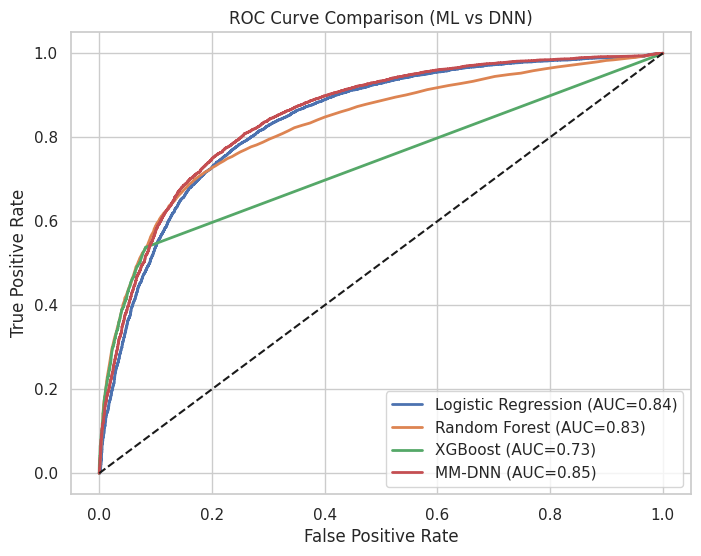

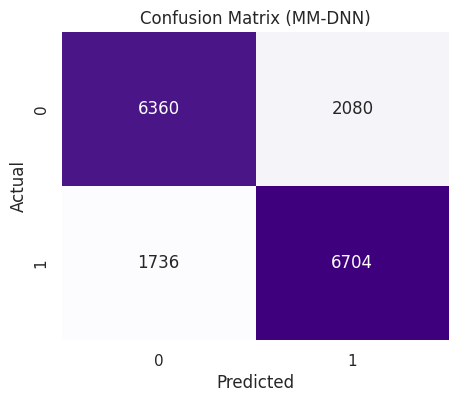


All tasks completed successfully!


In [1]:
# =========================================================
# Hybrid ML + DNN Pipeline for Drug–Disease Association
# - ML Models: Logistic Regression, Random Forest, XGBoost
# - DNN Model: Drug Tower + Disease Embedding (MM-DNN)
# - Feature Engineering: Morgan FP + Target Multi-Hot + DiseaseID Encoding
# - Negative Sampling: Balanced, Non-conflicting sampling
# =========================================================

!pip install rdkit-pypi protobuf==3.20.3 -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import tensorflow as tf

from rdkit import Chem
from rdkit.Chem import AllChem

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from tensorflow.keras import layers, models, callbacks, regularizers

sns.set(style="whitegrid")

# =========================================================
# 1. Load data (Kaggle compatible)
# =========================================================
try:
    drugs = pd.read_csv("/kaggle/input/drug-repositioning/drugsInfo.csv")
    diseases = pd.read_csv("/kaggle/input/drug-repositioning/diseasesInfo.csv")
    mapping = pd.read_csv("/kaggle/input/drug-repositioning/mapping.csv")
    print("資料讀取成功！")
except:
    raise FileNotFoundError("找不到 Kaggle 資料，請確認 Dataset 是否正確掛載！")

print("Drugs:", drugs.shape)
print("Diseases:", diseases.shape)
print("Mapping:", mapping.shape)

# =========================================================
# 2. Feature Engineering
# =========================================================

# -----------------------------
# (A) Drug Features: Morgan FP
# -----------------------------
def smiles_to_fp(smile, n_bits=1024):
    mol = Chem.MolFromSmiles(str(smile))
    if mol is None:
        return np.zeros(n_bits, dtype=np.int8)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=n_bits)
    arr = np.zeros((n_bits,), dtype=np.int8)
    Chem.DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

print("Converting SMILES → Morgan Fingerprints...")
fp_matrix = np.stack(drugs["DrugSmile"].apply(smiles_to_fp).values)

# -----------------------------
# (B) Drug Targets → Multi-Hot
# -----------------------------
def parse_target(val):
    try:
        return ast.literal_eval(val)
    except:
        return []

drugs["TargetList"] = drugs["DrugTarget"].apply(parse_target)
mlb = MultiLabelBinarizer()
target_matrix = mlb.fit_transform(drugs["TargetList"])

# Merge drug features
drug_features = np.concatenate([fp_matrix, target_matrix], axis=1)
drug_dim = drug_features.shape[1]

drug_feat_df = pd.DataFrame(
    drug_features, 
    columns=[f"F_{i}" for i in range(drug_dim)]
)
drug_feat_df["DrugID"] = drugs["DrugID"]

print(f"Drug feature dimension = {drug_dim} (FP + Target multi-hot)")

# -----------------------------
# (C) Disease Features
# -----------------------------

# (C1) One-Hot for ML models
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
disease_ohe = enc.fit_transform(diseases[["DiseaseID"]])
disease_ohe_df = pd.DataFrame(
    disease_ohe, 
    columns=[f"D_{i}" for i in range(disease_ohe.shape[1])]
)
disease_ohe_df["DiseaseID"] = diseases["DiseaseID"]

# (C2) Categorical index for DNN embedding
le_disease = LabelEncoder()
diseases["freq_id"] = le_disease.fit_transform(diseases["DiseaseID"])
num_diseases = len(le_disease.classes_)

disease_map = diseases[["DiseaseID", "freq_id"]]

print(f"Total distinct diseases = {num_diseases}")

# =========================================================
# 3. 建立 Positive / Negative Samples
# =========================================================

print("Building positive and negative samples...")

# -----------------------------
# Positive Samples (Label = 1)
# -----------------------------
pos_pairs = mapping.merge(drug_feat_df, on="DrugID") \
                   .merge(disease_ohe_df, on="DiseaseID") \
                   .merge(disease_map, on="DiseaseID")
pos_pairs["label"] = 1

print("Positive samples:", pos_pairs.shape)

# -----------------------------
# Negative Sampling (Balanced, Non-conflicting)
# -----------------------------
all_dis_ids = diseases["DiseaseID"].values
drug2pos = mapping.groupby("DrugID")["DiseaseID"].apply(set).to_dict()

neg_list = []
rng = np.random.default_rng(42)

for drug_id, pos_set in drug2pos.items():
    # 候選疾病 = 所有疾病 - 正樣本
    candidates = np.setdiff1d(all_dis_ids, list(pos_set))
    n_neg = min(len(pos_set), len(candidates))  # 1:1 平衡採樣
    
    if n_neg > 0:
        sampled = rng.choice(candidates, size=n_neg, replace=False)
        for d in sampled:
            neg_list.append((drug_id, d))

neg_df = pd.DataFrame(neg_list, columns=["DrugID", "DiseaseID"])

neg_pairs = neg_df.merge(drug_feat_df, on="DrugID") \
                  .merge(disease_ohe_df, on="DiseaseID") \
                  .merge(disease_map, on="DiseaseID")
neg_pairs["label"] = 0

print("Negative samples:", neg_pairs.shape)

# -----------------------------
# 合併正負樣本 → Final Dataset
# -----------------------------
full = pd.concat([pos_pairs, neg_pairs]).sample(frac=1.0, random_state=42)

print("Final dataset:", full.shape)

# -----------------------------
# ML models feature matrix
# -----------------------------
X_ML = full.drop(columns=["DrugID", "DiseaseID", "freq_id", "label"]).astype(np.float32)
y = full["label"].values.astype(np.float32)

# -----------------------------
# DNN feature matrix
# -----------------------------
X_drug = full[[f"F_{i}" for i in range(drug_dim)]].values.astype(np.float32)
X_disease = full["freq_id"].values.astype(np.int32)

print("ML Feature Matrix:", X_ML.shape)
print("DNN Drug Feature Matrix:", X_drug.shape)
print("DNN Disease Index:", X_disease.shape)
print("Labels:", y.shape)

# =========================================================
# 4. Train/Test Split (Shared for ML & DNN)
# =========================================================

Xdr_train, Xdr_test, Xdis_train, Xdis_test, y_train, y_test = train_test_split(
    X_drug, X_disease, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ML 模型專用輸入
XML_train, XML_test, _, _ = train_test_split(
    X_ML, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", len(y_train))
print("Test size :", len(y_test))

# =========================================================
# 5. Training ML Models
# =========================================================

# -----------------------------
# Logistic Regression
# -----------------------------
print("\nTraining Logistic Regression...")
scaler = StandardScaler()
XML_train_scaled = scaler.fit_transform(XML_train)
XML_test_scaled = scaler.transform(XML_test)

lr = LogisticRegression(max_iter=2000)
lr.fit(XML_train_scaled, y_train)

# -----------------------------
# Random Forest
# -----------------------------
print("Training Random Forest...")
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(XML_train, y_train)

# -----------------------------
# XGBoost
# -----------------------------
print("Training XGBoost...")
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss"
)
xgb_model.fit(XML_train, y_train)

print("\nML models training completed.")

# =========================================================
# 6. Build DNN Model (MM-DNN: Drug Tower + Disease Embedding)
# =========================================================

def build_mm_dnn(drug_dim, num_disease_tokens, embedding_dim=32):
    
    # --- Drug Tower ---
    input_drug = layers.Input(shape=(drug_dim,), name="Drug_Input")

    x = layers.Dense(256, kernel_regularizer=regularizers.l2(0.001))(input_drug)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(128, kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(0.3)(x)

    # --- Disease Embedding Tower ---
    input_disease = layers.Input(shape=(1,), name="Disease_Input")
    d = layers.Embedding(num_disease_tokens, embedding_dim)(input_disease)
    d = layers.Flatten()(d)

    # --- Fusion ---
    merged = layers.Concatenate()([x, d])

    # --- Output Layer ---
    y_out = layers.Dense(1, activation="sigmoid")(merged)

    model = models.Model(inputs=[input_drug, input_disease], outputs=y_out)
    return model

print("\nBuilding MM-DNN model...")
model = build_mm_dnn(drug_dim, num_diseases)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["AUC", "accuracy"]
)

model.summary()

# =========================================================
# 7. Train DNN (EarlyStopping)
# =========================================================

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    [Xdr_train, Xdis_train], y_train,
    validation_data=([Xdr_test, Xdis_test], y_test),
    epochs=30,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

# =========================================================
# 8. Evaluate all models together
# =========================================================

def evaluate_model(name, prob, pred):
    auc = roc_auc_score(y_test, prob)
    acc = accuracy_score(y_test, pred)
    f1  = f1_score(y_test, pred)

    print(f"{name:18s} | AUC={auc:.4f} | ACC={acc:.4f} | F1={f1:.4f}")
    return auc

print("\n========== MODEL COMPARISON ==========")

# Logistic Regression
lr_prob = lr.predict_proba(XML_test_scaled)[:,1]
lr_pred = lr.predict(XML_test_scaled)
auc_lr = evaluate_model("Logistic Regression", lr_prob, lr_pred)

# Random Forest
rf_prob = rf.predict_proba(XML_test)[:,1]
rf_pred = rf.predict(XML_test)
auc_rf = evaluate_model("Random Forest", rf_prob, rf_pred)

# XGBoost
xgb_prob = xgb_model.predict_proba(XML_test)[:,1]
xgb_pred = xgb_model.predict(XML_test)
auc_xgb = evaluate_model("XGBoost", xgb_prob, xgb_pred)

# DNN
dnn_prob = model.predict([Xdr_test, Xdis_test]).ravel()
dnn_pred = (dnn_prob > 0.5).astype(int)
auc_dnn = evaluate_model("MM-DNN", dnn_prob, dnn_pred)

# =========================================================
# 9. ROC Curve — ML vs DNN
# =========================================================

plt.figure(figsize=(8, 6))

def plot_roc(prob, label):
    fpr, tpr, _ = roc_curve(y_test, prob)
    auc = roc_auc_score(y_test, prob)
    plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC={auc:.2f})")

plot_roc(lr_prob,  "Logistic Regression")
plot_roc(rf_prob,  "Random Forest")
plot_roc(xgb_prob, "XGBoost")
plot_roc(dnn_prob, "MM-DNN")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (ML vs DNN)")
plt.legend()
plt.show()

# =========================================================
# 10. Confusion Matrix (DNN)
# =========================================================

cm = confusion_matrix(y_test, dnn_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("Confusion Matrix (MM-DNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nAll tasks completed successfully!")


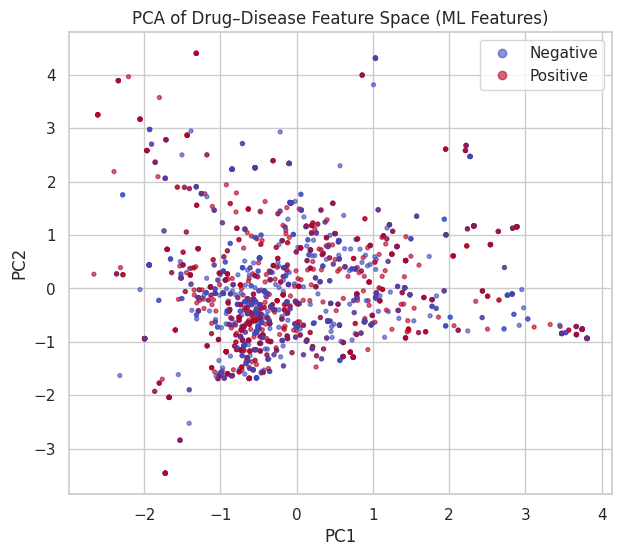

In [2]:
from sklearn.decomposition import PCA
# =========================================================
# 11. (Optional) PCA Visualization on ML Feature Space
# =========================================================

# 抽樣避免點太多
n_sample = min(2000, len(X_ML))
idx = np.random.choice(len(X_ML), n_sample, replace=False)
X_sample = X_ML.iloc[idx] if isinstance(X_ML, pd.DataFrame) else X_ML[idx]
y_sample = y[idx]

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sample)

plt.figure(figsize=(7, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y_sample, cmap="coolwarm",
    s=8, alpha=0.6
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Drug–Disease Feature Space (ML Features)")
handles, _ = scatter.legend_elements()
plt.legend(handles, ["Negative", "Positive"])
plt.show()


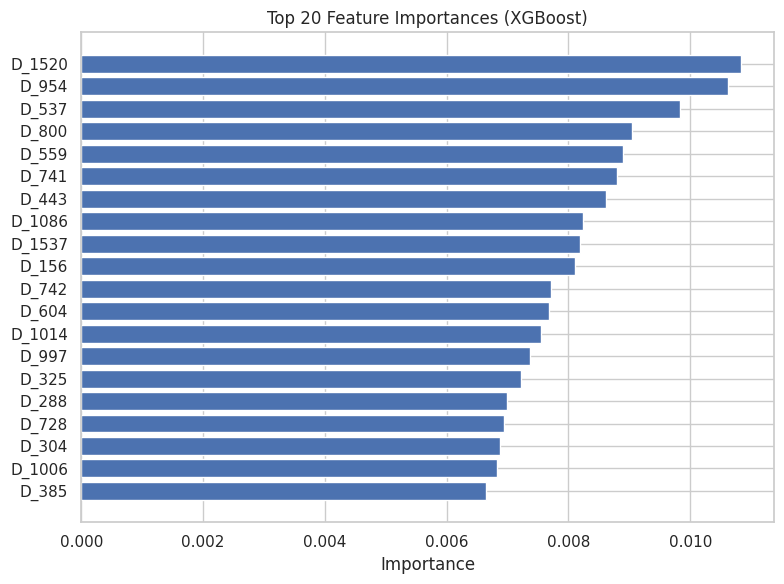

In [3]:
# =========================================================
# 12. (Optional) XGBoost Feature Importance
# =========================================================

# 如果 X_ML 是 DataFrame，可以拿到欄名；如果不是，先轉一下
if isinstance(X_ML, pd.DataFrame):
    feature_names = X_ML.columns.tolist()
else:
    feature_names = [f"F_{i}" for i in range(X_ML.shape[1])]

importances = xgb_model.feature_importances_
idx = np.argsort(importances)[-20:]   # Top 20

plt.figure(figsize=(8, 6))
plt.barh(range(len(idx)), importances[idx])
plt.yticks(range(len(idx)), [feature_names[i] for i in idx])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()
